In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from itertools import cycle
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import RidgeClassifier





# Turn off the warnings.
warnings.filterwarnings(action='ignore')
# Specifically for LightGBM
import logging
logging.getLogger('lightgbm').setLevel(logging.ERROR)
%matplotlib inline

------
## Reading Data

In [345]:
Trained_Data = pd.read_csv("./nsl_kdd/KDDTrain+.txt" , sep = "," , encoding = 'utf-8')
Tested_Data  = pd.read_csv("./nsl_kdd/KDDTest+.txt" , sep = "," , encoding = 'utf-8')

Columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

Trained_Data.columns = Columns
Tested_Data.columns  = Columns

# remove the level columns as it is not needed
Trained_Data = Trained_Data.drop(['level'], axis=1)
Tested_Data = Tested_Data.drop(['level'], axis=1)

---------
## Exploring Data

In [346]:
Trained_Data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125968,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [347]:
Tested_Data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22539,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22541,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


-------
## Data Description

In [348]:
Trained_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [349]:
Tested_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [350]:
Trained_Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.0,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.0,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [351]:
# Get all columns that are int64 type and contain only 0s and 1s
def get_boolean_columns(df):
    int_cols = df.select_dtypes(include=['int64']).columns
    boolean_cols = []
    
    for col in int_cols:
        unique_vals = set(df[col].unique())
        if unique_vals.issubset({0, 1}):
            boolean_cols.append(col)
            
    return boolean_cols

# Get boolean columns for both datasets
train_boolean_cols = get_boolean_columns(Trained_Data)
test_boolean_cols = get_boolean_columns(Tested_Data)

print("Boolean columns in Training Data:", train_boolean_cols)
print("Boolean columns in Testing Data:", test_boolean_cols)

Boolean columns in Training Data: ['land', 'logged_in', 'root_shell', 'num_outbound_cmds', 'is_host_login', 'is_guest_login']
Boolean columns in Testing Data: ['land', 'logged_in', 'root_shell', 'num_outbound_cmds', 'is_host_login', 'is_guest_login']


In [352]:
Tested_Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.0,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,0.002440,0.000266,0.114670,0.008739,0.001153,0.003549,0.0,0.000488,0.028435,79.021692,31.125316,0.102928,0.103640,0.238429,0.235145,0.740376,0.094075,0.098115,193.866699,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649
std,1407.207069,4.727969e+05,2.121976e+04,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,0.049335,0.021061,8.041792,0.676857,0.048015,0.067831,0.0,0.022085,0.166214,128.538218,89.064396,0.295373,0.298337,0.416096,0.416193,0.412479,0.259143,0.253550,94.036867,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,123.000000,16.000000,0.000000,0.000000,0.250000,0.070000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


-----
## Exploring Responses

In [353]:
Results = set(Trained_Data['attack'].values)
print(Results,end=" ")

{'buffer_overflow', 'warezclient', 'back', 'rootkit', 'loadmodule', 'ftp_write', 'land', 'portsweep', 'satan', 'neptune', 'nmap', 'perl', 'pod', 'warezmaster', 'smurf', 'multihop', 'spy', 'normal', 'guess_passwd', 'phf', 'ipsweep', 'teardrop', 'imap'} 

## Classifying The Attack Results

In [354]:
# changing attack labels to their respective attack class
def change_label(df):
 df.attack.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
 df.attack.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
 df.attack.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
 df.attack.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)
change_label(Trained_Data)
change_label(Tested_Data)


In [355]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data['attack_state'] = attack_LE.fit_transform(Trained_Data["attack"])
Tested_Data['attack_state'] = attack_LE.fit_transform(Tested_Data["attack"])

In [356]:
Trained_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_state
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,4
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,Dos,0
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,4
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,4
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,Dos,0
5,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,Dos,0
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,Dos,0
7,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,Dos,0
8,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,Dos,0
9,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205,12,0.0,0.0,1.0,1.0,0.06,0.06,0.00,255,12,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,Dos,0


In [357]:
Trained_Data.attack.value_counts()

attack
normal    67342
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

In [358]:
Tested_Data.attack.value_counts()

attack
normal    9711
Dos       7459
R2L       2885
Probe     2421
U2R         67
Name: count, dtype: int64

In [359]:
Trained_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_state
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,4
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,Dos,0
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,4
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,4
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,Dos,0
5,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,Dos,0
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,Dos,0
7,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,Dos,0
8,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,Dos,0
9,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205,12,0.0,0.0,1.0,1.0,0.06,0.06,0.00,255,12,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,Dos,0


In [360]:
Tested_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_state
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,Dos,0
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,4
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,Probe,1
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,Probe,1
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,4
5,0,tcp,smtp,SF,1022,387,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,0.0,0.00,0.0,0.0,1.00,0.00,1.00,255,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,4
6,0,tcp,telnet,SF,129,174,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,R2L,2
7,0,tcp,http,SF,327,467,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,33,47,0.0,0.00,0.0,0.0,1.00,0.00,0.04,151,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,4
8,0,tcp,ftp,SF,26,157,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,52,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,R2L,2
9,0,tcp,telnet,SF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,255,128,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,Probe,1


--------
## Data preprocessing
### Chechking for Missing Data

In [361]:
Trained_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [362]:
Tested_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

-----
- **There is no missing data**

--------
### Checking for Duplicates

In [363]:
Trained_Data.duplicated().sum()

9

In [364]:
Trained_Data.drop_duplicates(subset=None, keep="first", inplace=True)
Trained_Data.duplicated().sum()

0

In [365]:
Tested_Data.duplicated().sum()

3

In [366]:
Tested_Data.drop_duplicates(subset=None, keep="first", inplace=True)
Tested_Data.duplicated().sum()

0

-------------
## Data Encoding

In [367]:
Trained_Data = pd.get_dummies(Trained_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")
Tested_Data = pd.get_dummies(Tested_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [368]:
Trained_Data.head(10)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_state,icmp,tcp,udp,IRC,X11,Z39_50,aol,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,harvest,hostnames,http,http_2784,http_443,http_8001,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,Dos,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,Dos,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [369]:
# remove the attack column
Trained_Data = Trained_Data.drop(['attack'], axis=1)
Tested_Data = Tested_Data.drop(['attack'], axis=1)


In [370]:
# Convert any boolean columns to 0/1 integers
def convert_bool_to_int(df):
    bool_cols = df.select_dtypes(include=['bool']).columns
    for col in bool_cols:
        df[col] = df[col].astype(int)
    return df

# Apply to both datasets if needed
Trained_Data = convert_bool_to_int(Trained_Data)
Tested_Data = convert_bool_to_int(Tested_Data)

In [371]:
# check that the encodings are correct as there may be some things in the trained that aren't in the tested etc
# Get the column names for both datasets
train_cols = set(Trained_Data.columns)
test_cols = set(Tested_Data.columns)

# Find any columns that are in one dataset but not the other
train_only = train_cols - test_cols
test_only = test_cols - train_cols

# Print any mismatched columns
if len(train_only) > 0:
    print("Columns in training data but not in test data:")
    print(train_only)
    
if len(test_only) > 0:
    print("Columns in test data but not in training data:")
    print(test_only)
# Remove columns that are in training but not in test data
for col in train_only:
    Trained_Data.drop(col, axis=1, inplace=True)
    
print(f"are the columns the same? {Trained_Data.columns.equals(Tested_Data.columns)}")

Columns in training data but not in test data:
{'red_i', 'http_2784', 'aol', 'harvest', 'http_8001', 'urh_i'}
are the columns the same? True


In [372]:
Trained_Data.head(10)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_state,icmp,tcp,udp,IRC,X11,Z39_50,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,hostnames,http,http_443,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urp_i,uucp,uucp_path,vmnet,whois,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205,12,0.0,0.0,1.0,1.0,0.06,0.06,0.00,255,12,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


----
## Data Splitting 

In [373]:
X_train = Trained_Data.drop('attack_state', axis = 1)
X_test = Tested_Data.drop('attack_state', axis = 1)


Y_train = Trained_Data['attack_state']
Y_test = Tested_Data['attack_state']

In [374]:
X_train_final,X_valid ,Y_train_final,Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=42, stratify=Y_train)

---------
## Data Scaling

In [375]:
Ro_scaler = RobustScaler() # good for outliers
X_train_final = Ro_scaler.fit_transform(X_train_final) 
X_valid= Ro_scaler.transform(X_valid)
X_test  = Ro_scaler.transform(X_test)

In [376]:
X_train_final.shape, Y_train_final.shape

((100770, 116), (100770,))

In [377]:
X_valid.shape, Y_valid.shape

((25193, 116), (25193,))

In [378]:
X_test.shape, Y_test.shape

((22540, 116), (22540,))

------
## Working on Trained Data
### VIF 

In [379]:
A = sm.add_constant(X_train.astype(float))
Est1 = sm.GLM(Y_train.astype(float), A)
Est2 = Est1.fit()
Est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           attack_state   No. Observations:               125963
Model:                            GLM   Df Residuals:                   125849
Model Family:                Gaussian   Df Model:                          113
Link Function:               Identity   Scale:                         0.33543
Method:                          IRLS   Log-Likelihood:            -1.0988e+05
Date:                Sun, 01 Dec 2024   Deviance:                       42214.
Time:                        18:49:45   Pearson chi2:                 4.22e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.9217      0.110     17.492      0.000       1.706       2.137
duration                     1.334e-05   7.83e-07     17.042      0.000    1.18e-05    1.49e-05
src_bytes                   -1.383e-09   2.84e-10     -4.863      0.000   -1.94e-09   -8.26e-10
dst_bytes                    -4.36e-10   4.06e-10     -1.073      0.283   -1.23e-09     3.6e-10
land                            0.3633      0.118      3.077      0.002       0.132       0.595
wrong_fragment                 -0.8922      0.008   -118.254      0.000      -0.907      -0.877
urgent                          0.1110      0.115      0.963      0.336      -0.115       0.337
hot                            -0.0708      0.001    -47.320      0.000      -0.074      -0.068
num_failed_logins               0.1698      0.037      4.563      0.000       0.097       0.243
logged_in                      -0.5554      0.013    -42.801      0.000      -0.581      -0.530
num_compromised                -0.0326      0.002    -15.915      0.000      -0.037      -0.029
root_shell                      0.0480      0.057      0.840      0.401      -0.064       0.160
su_attempted                   -0.1182      0.059     -2.005      0.045      -0.234      -0.003
num_root                        0.0325      0.002     15.921      0.000       0.029       0.037
num_file_creations              0.0437      0.003     12.487      0.000       0.037       0.051
num_shells                      0.2654      0.075      3.559      0.000       0.119       0.411
num_access_files               -0.1150      0.023     -5.086      0.000      -0.159      -0.071
num_outbound_cmds            3.672e-15   1.46e-15      2.506      0.012       8e-16    6.54e-15
is_host_login                   1.1327      0.579      1.955      0.051      -0.003       2.268
is_guest_login                  1.6039      0.042     37.925      0.000       1.521       1.687
count                          -0.0002   3.44e-05     -5.264      0.000      -0.000      -0.000
srv_count                      -0.0018   5.09e-05    -35.849      0.000      -0.002      -0.002
serror_rate                     0.3080      0.041      7.507      0.000       0.228       0.388
srv_serror_rate                -1.0899      0.045    -24.400      0.000      -1.177      -1.002
rerror_rate                     0.4670      0.044     10.651      0.000       0.381       0.553
srv_rerror_rate                -2.3950      0.051    -47.070      0.000      -2.495      -2.295
same_srv_rate                   1.4823      0.014    102.473      0.000       1.454       1.511
diff_srv_rate                   0.6480      0.014     46.377      0.000       0.621       0.675
srv_diff_host_rate             -0.1119      0.008    -13.728      0.000      -0.128      -0.096
dst_host_co

In [380]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Filter numeric columns only
X_numeric = df.select_dtypes(include=[np.number])

# Calculate VIF
vif = pd.DataFrame()
vif['Feature'] = X_numeric.columns
vif['VIF'] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
print(vif.sort_values(by='VIF', ascending=False))

                        Feature         VIF
12                     num_root  919.248352
9               num_compromised  892.342204
22              srv_serror_rate  173.785577
21                  serror_rate  146.120860
35     dst_host_srv_serror_rate   85.661290
24              srv_rerror_rate   75.652007
23                  rerror_rate   71.058547
34         dst_host_serror_rate   60.465350
30       dst_host_same_srv_rate   26.457504
37     dst_host_srv_rerror_rate   23.022561
25                same_srv_rate   19.114532
29           dst_host_srv_count   17.127994
36         dst_host_rerror_rate   10.598054
28               dst_host_count    6.865392
19                        count    6.378564
8                     logged_in    5.183887
20                    srv_count    4.031954
18               is_guest_login    3.987133
6                           hot    3.911788
31       dst_host_diff_srv_rate    2.941575
11                 su_attempted    2.622979
32  dst_host_same_src_port_rate 

we can consider removing
12                     num_root  919.248352
9               num_compromised  892.342204
22              srv_serror_rate  173.785577
21                  serror_rate  146.120860
35     dst_host_srv_serror_rate   85.661290
24              srv_rerror_rate   75.652007
23                  rerror_rate   71.058547
34         dst_host_serror_rate   60.465350
30       dst_host_same_srv_rate   26.457504
37     dst_host_srv_rerror_rate   23.022561
25                same_srv_rate   19.114532
29           dst_host_srv_count   17.127994
36         dst_host_rerror_rate   10.598054

as these are the ones with the highest VIF

In [381]:
# Convert numpy arrays to pandas DataFrames
X_train_df = pd.DataFrame(X_train_final)
y_train_df = pd.DataFrame(Y_train_final, columns=['attack_state'])

# Now perform the concatenation
correlations = pd.concat([X_train_df, y_train_df], axis=1).corr()
print(correlations['attack_state'].sort_values(ascending=False))

attack_state    1.000000
112             0.008163
55              0.006558
32              0.006537
44              0.006115
                  ...   
75             -0.007304
70             -0.007332
93             -0.008463
16                   NaN
17                   NaN
Name: attack_state, Length: 117, dtype: float64


None are highly correlated with the attack_state

--------
### Data Modeling

#### Evaluating Function

In [392]:
def Evaluate(Model_Name, Model_Abb, X_test, Y_test):
    
    Pred_Value = Model_Abb.predict(X_test)
    
    # Overall metrics
    Accuracy = metrics.accuracy_score(Y_test, Pred_Value)
    Precision = metrics.precision_score(Y_test, Pred_Value, average='weighted')
    Recall = metrics.recall_score(Y_test, Pred_Value, average='weighted')
    F1_score = metrics.f1_score(Y_test, Pred_Value, average='weighted')
    
    # Per-class metrics
    class_names = ['normal', 'Dos', 'R2L', 'Probe', 'U2R']
    per_class_accuracy = metrics.precision_recall_fscore_support(Y_test, Pred_Value, average=None)
    
    print('--------------------------------------------------\n')
    print('Overall Metrics:\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy,2)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision,2)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall,2)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score,2)))
    print('--------------------------------------------------\n')
    print('Per-Class Metrics:\n')
    
    # Print per-class metrics in a formatted table
    print(f"{'Class':<10} {'Precision':>10} {'Recall':>10} {'F1-Score':>10} {'Support':>10}")
    print('-' * 55)
    for i, class_name in enumerate(class_names):
        print(f"{class_name:<10} {per_class_accuracy[0][i]:>10.2f} {per_class_accuracy[1][i]:>10.2f} {per_class_accuracy[2][i]:>10.2f} {per_class_accuracy[3][i]:>10d}")
    print('--------------------------------------------------\n')
    
    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    plot_confusion_matrix(Confusion_Matrix, class_names=['normal','Dos','R2L','Probe','U2R'], figsize=(5.55,5), colorbar= "blue")
    
    # Compute ROC curve and ROC AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(np.unique(Y_test))
    y_score = Model_Abb.predict_proba(X_test)
    y_onehot_test = pd.get_dummies(Y_test)
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_onehot_test.iloc[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC AUC
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_onehot_test.values.ravel(), y_score.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

    # Plot ROC curve
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(fpr["micro"], tpr["micro"], label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})", color="deeppink", linestyle=":", linewidth=4)
    plt.plot(fpr["macro"], tpr["macro"], label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})", color="navy", linestyle=":", linewidth=4)
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for class_id, color in zip(range(n_classes), colors):
        plt.plot(fpr[class_id], tpr[class_id], color=color, lw=2, label=f"ROC curve for class {class_id} (AUC = {roc_auc[class_id]:.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(Model_Name)
    plt.legend(loc="lower right")
    plt.show()



#### Grid Search Function

In [383]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_
    
    return (Model_Name)

## 1. Logistic Regression

In [384]:
LR= LogisticRegression()
LR.fit(X_train_final , Y_train_final)

LogisticRegression()

In [385]:
LR.score(X_train_final, Y_train_final), LR.score(X_valid, Y_valid)

(0.8619926565446066, 0.8613106815385226)

--------------------------------------------------

The Logistic Regression Model Accuracy   = 0.86

The Logistic Regression Model Precision  = 0.86

The Logistic Regression Model Recall     = 0.86

The Logistic Regression Model F1 Score   = 0.86

--------------------------------------------------



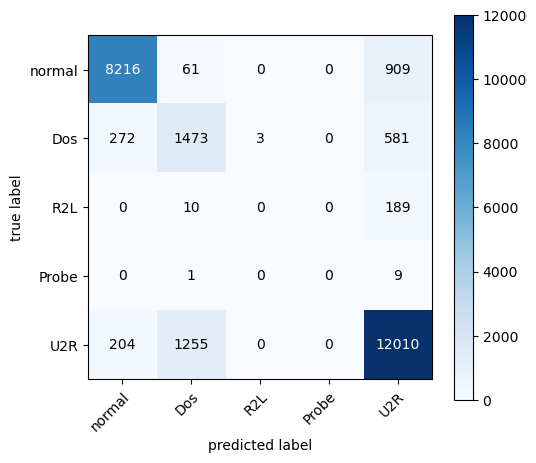

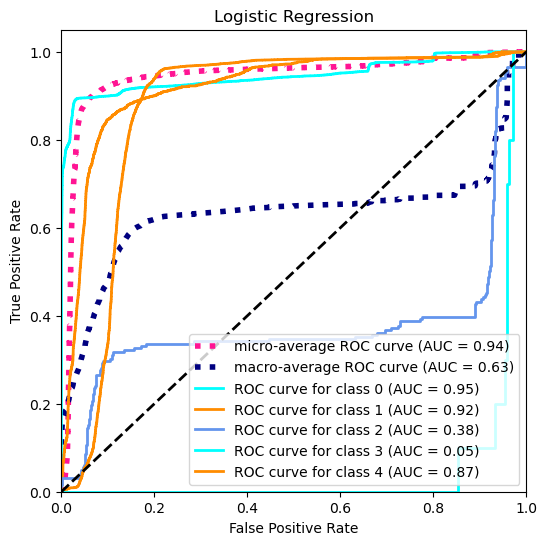

In [386]:
Evaluate('Logistic Regression', LR, X_valid, Y_valid)

--------------------------------------------------

The Logistic Regression Model Accuracy   = 0.68

The Logistic Regression Model Precision  = 0.61

The Logistic Regression Model Recall     = 0.68

The Logistic Regression Model F1 Score   = 0.63

--------------------------------------------------



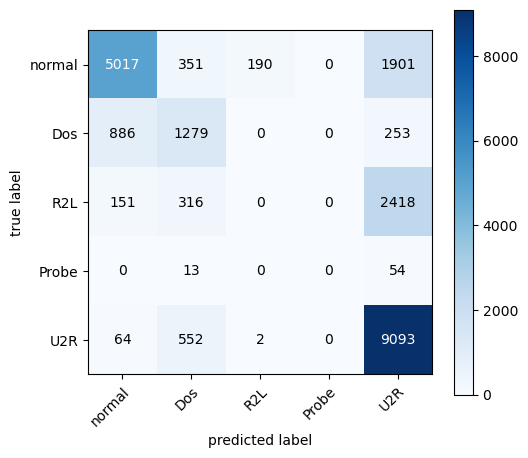

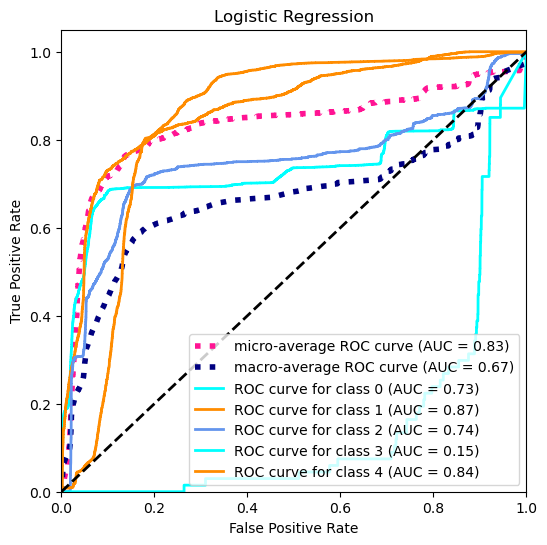

In [387]:
Evaluate('Logistic Regression', LR, X_test, Y_test)

----------------

## 2. Decision Tree Classifier

In [45]:
DT =DecisionTreeClassifier(max_features=6, max_depth=4)
DT.fit(X_train_final, Y_train_final)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [46]:
DT.score(X_train_final, Y_train_final), DT.score(X_valid, Y_valid)

(0.9009547802523499, 0.9014956654282176)

--------------------------------------------------

The Decision Tree Classifier Model Accuracy   = 0.9

The Decision Tree Classifier Model Precision  = 0.89

The Decision Tree Classifier Model Recall     = 0.9

The Decision Tree Classifier Model F1 Score   = 0.89

--------------------------------------------------



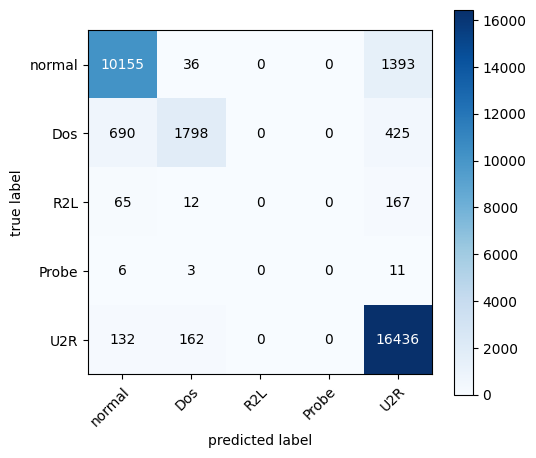

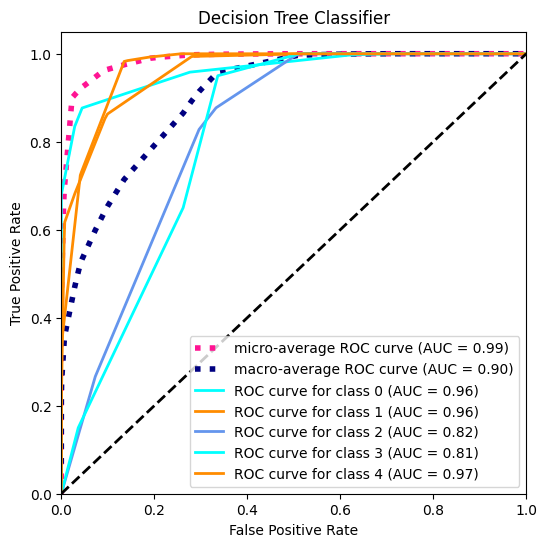

In [47]:
Evaluate('Decision Tree Classifier', DT, X_valid, Y_valid)

[Text(0.4375, 0.9, 'x[32] <= -0.083\ngini = 0.572\nsamples = 94472\nvalue = [34343, 8734, 751, 32, 50612]'),
 Text(0.20833333333333334, 0.7, 'x[34] <= 0.985\ngini = 0.504\nsamples = 47206\nvalue = [28623, 1560, 193, 3, 16827]'),
 Text(0.125, 0.5, 'x[38] <= -0.125\ngini = 0.45\nsamples = 23884\nvalue = [5311, 1560, 193, 3, 16817]'),
 Text(0.08333333333333333, 0.3, 'x[74] <= 0.5\ngini = 0.386\nsamples = 7067\nvalue = [5311, 1560, 193, 3, 0]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.387\nsamples = 7017\nvalue = [5263, 1558, 193, 3, 0]'),
 Text(0.125, 0.1, 'gini = 0.077\nsamples = 50\nvalue = [48, 2, 0, 0, 0]'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 16817\nvalue = [0, 0, 0, 0, 16817]'),
 Text(0.2916666666666667, 0.5, 'x[66] <= 0.5\ngini = 0.001\nsamples = 23322\nvalue = [23312, 0, 0, 0, 10]'),
 Text(0.25, 0.3, 'x[12] <= 1.0\ngini = 0.001\nsamples = 23057\nvalue = [23047, 0, 0, 0, 10]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.001\nsamples = 23056\nvalue = [23047, 0, 

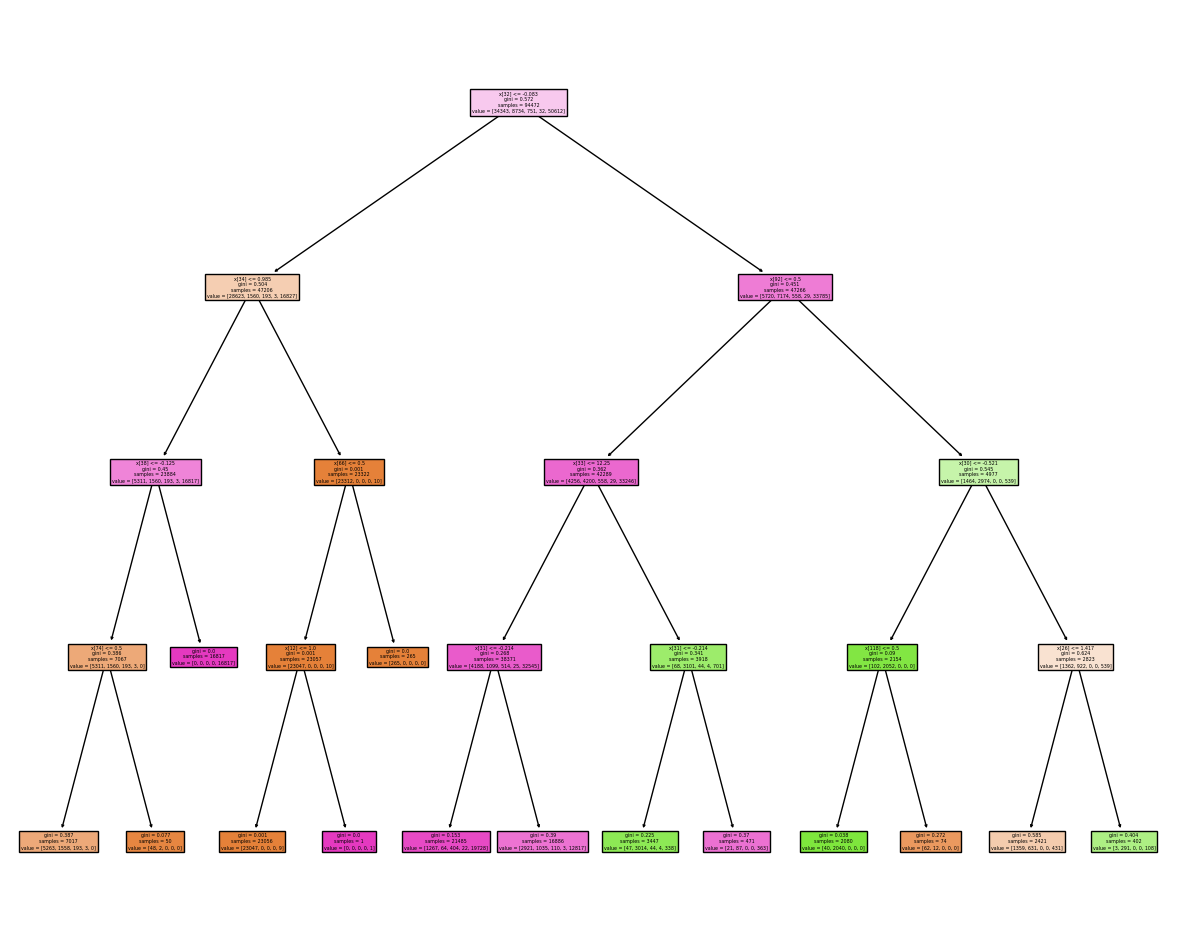

In [48]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(DT, filled=True)

----------------

## 3. Random Forest Classifier

In [49]:
max_depth= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    
Parameters={ 'max_depth': max_depth}

In [50]:
RF= RandomForestClassifier()
GridSearch(RF, Parameters, X_train_final, Y_train_final)

RandomForestClassifier(max_depth=11)

In [51]:
RF.fit(X_train_final, Y_train_final)

RandomForestClassifier()

In [52]:
RF.score(X_train_final, Y_train_final), RF.score(X_valid, Y_valid)

(1.0, 0.9998729795814677)

--------------------------------------------------

The Random Forest Classifier Model Accuracy   = 1.0

The Random Forest Classifier Model Precision  = 1.0

The Random Forest Classifier Model Recall     = 1.0

The Random Forest Classifier Model F1 Score   = 1.0

--------------------------------------------------



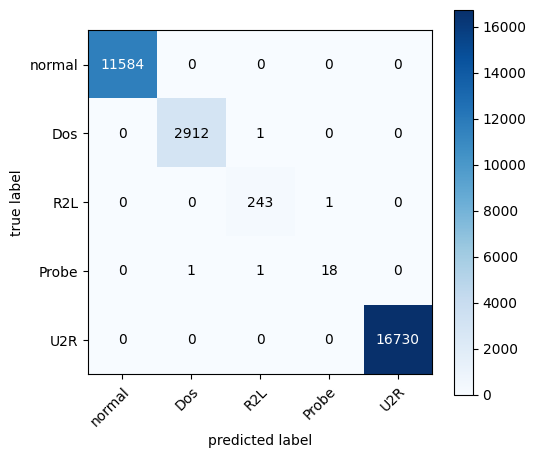

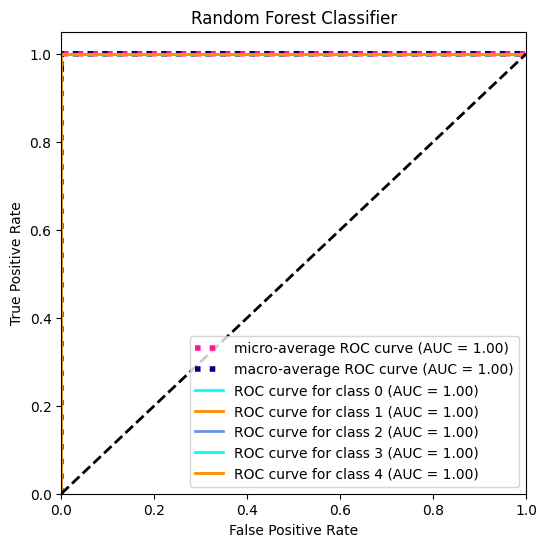

In [53]:
Evaluate('Random Forest Classifier', RF, X_valid, Y_valid)

----------------

## 4. KNN-Model

In [54]:
KNN= KNeighborsClassifier(n_neighbors=6) 
KNN.fit(X_train_final, Y_train_final)

KNeighborsClassifier(n_neighbors=6)

In [55]:
KNN.score(X_train_final, Y_train_final), KNN.score(X_valid, Y_valid)

(0.9949402997713608, 0.9929821218760916)

--------------------------------------------------

The KNN Model Accuracy   = 0.99

The KNN Model Precision  = 0.99

The KNN Model Recall     = 0.99

The KNN Model F1 Score   = 0.99

--------------------------------------------------



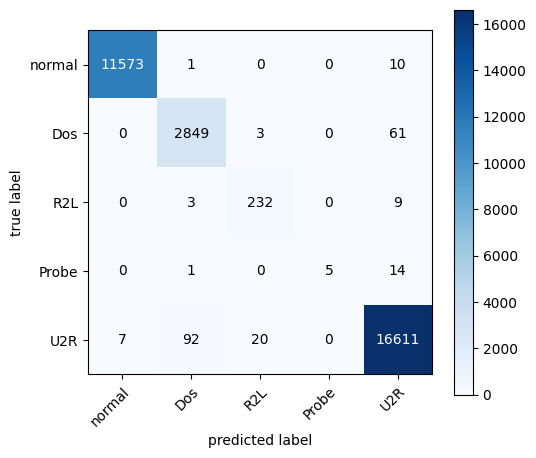

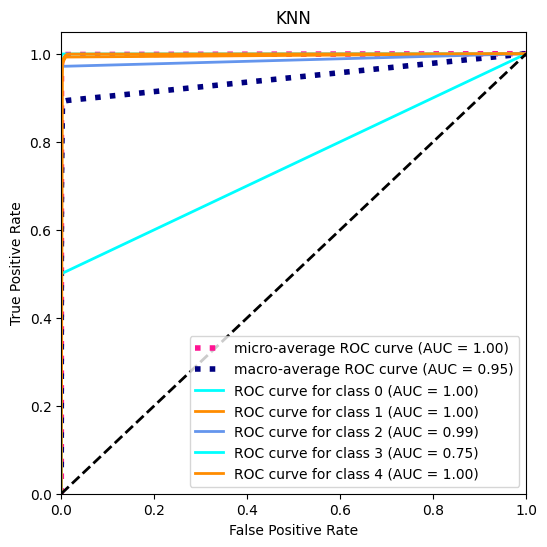

In [56]:
Evaluate('KNN', KNN, X_valid, Y_valid)

----------------
## 5. SVM Classifier

### 1st Kernel

In [57]:
# Create LinearSVC classifier without probability estimation
LinearSVC_classifier = LinearSVC()

# Wrap LinearSVC inside CalibratedClassifierCV with method='sigmoid' for Platt scaling
Platt_SVC = CalibratedClassifierCV(LinearSVC_classifier, method='sigmoid')

# Fit the classifier
Platt_SVC.fit(X_train_final, Y_train_final)

CalibratedClassifierCV(estimator=LinearSVC())

In [58]:
Platt_SVC.score(X_train_final, Y_train_final), Platt_SVC.score(X_valid, Y_valid)

(0.9064378863578626, 0.9064494617509765)

--------------------------------------------------

The SVM Linear SVC Kernel Model Accuracy   = 0.91

The SVM Linear SVC Kernel Model Precision  = 0.91

The SVM Linear SVC Kernel Model Recall     = 0.91

The SVM Linear SVC Kernel Model F1 Score   = 0.87

--------------------------------------------------



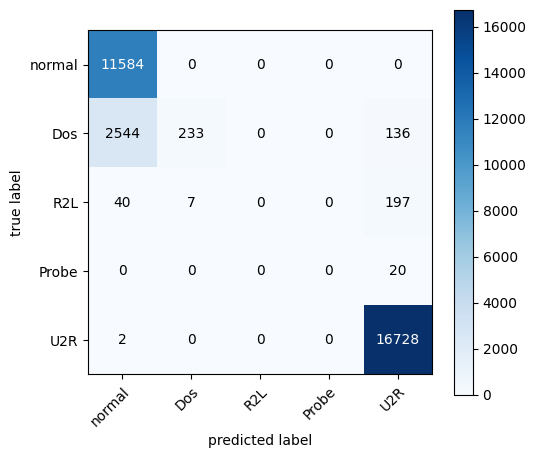

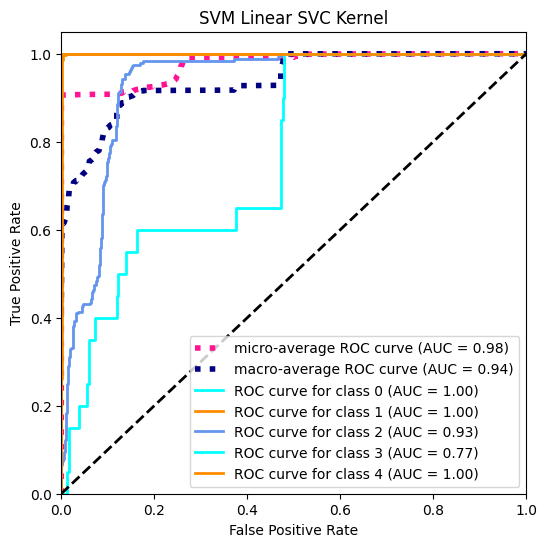

In [59]:
Evaluate('SVM Linear SVC Kernel', Platt_SVC,X_valid, Y_valid)

----------------
## 6. Gradient Boosting Classifier

In [60]:
# Instantiate and fit the Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(X_train_final, Y_train_final)


GradientBoostingClassifier()

In [61]:
# Print the training and testing scores
print("Gradient Boosting Classifier Training Score:", GB.score(X_train_final, Y_train_final))
print("Gradient Boosting Classifier Testing Score:", GB.score(X_valid, Y_valid))

Gradient Boosting Classifier Training Score: 1.0
Gradient Boosting Classifier Testing Score: 0.9998412244768347


--------------------------------------------------

The Gradient Boosting Classifier Model Accuracy   = 1.0

The Gradient Boosting Classifier Model Precision  = 1.0

The Gradient Boosting Classifier Model Recall     = 1.0

The Gradient Boosting Classifier Model F1 Score   = 1.0

--------------------------------------------------



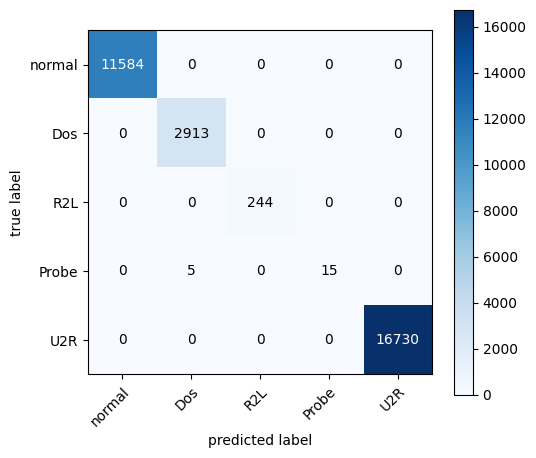

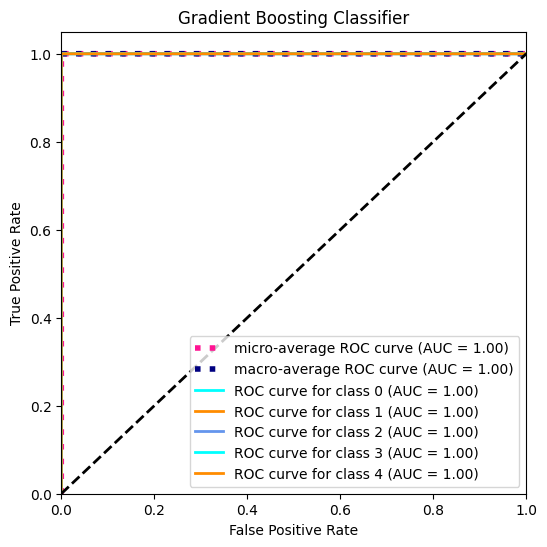

In [62]:
# Evaluate the Gradient Boosting Classifier
Evaluate('Gradient Boosting Classifier', GB, X_valid, Y_valid)

----------------

## 7. Extreme Gradient Boosting (XGBoost) Classifier

In [63]:
# Instantiate and fit the XGBoost Classifier
XGB = xgb.XGBClassifier(n_estimators=100, random_state=42)
XGB.fit(X_train_final, Y_train_final)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [64]:
# Print the training and testing scores
print("XGBoost Classifier Training Score:", XGB.score(X_train_final, Y_train_final))
print("XGBoost Classifier Testing Score:", XGB.score(X_valid, Y_valid))

XGBoost Classifier Training Score: 1.0
XGBoost Classifier Testing Score: 1.0


--------------------------------------------------

The XGBoost Classifier Model Accuracy   = 1.0

The XGBoost Classifier Model Precision  = 1.0

The XGBoost Classifier Model Recall     = 1.0

The XGBoost Classifier Model F1 Score   = 1.0

--------------------------------------------------



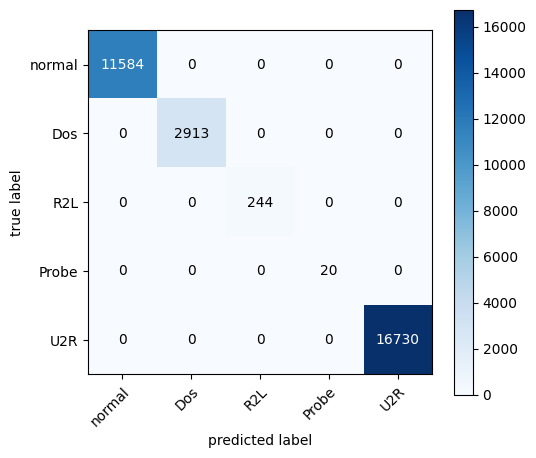

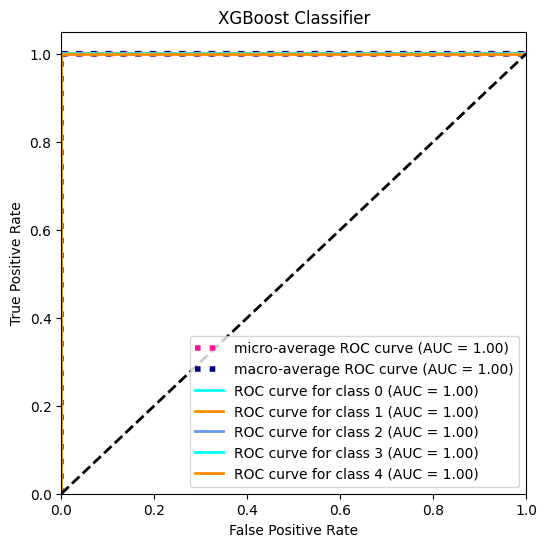

In [65]:
# Evaluate the XGBoost Classifier
Evaluate('XGBoost Classifier', XGB, X_valid, Y_valid)

----------------

## 8. Light Gradient Boosting Machine (LGBM) Classifier

In [66]:
# Instantiate and fit the LGBM Classifier
LGBM = lgb.LGBMClassifier()
LGBM.fit(X_train_final, Y_train_final)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3327
[LightGBM] [Info] Number of data points in the train set: 94472, number of used features: 112
[LightGBM] [Info] Start training from score -1.011905
[LightGBM] [Info] Start training from score -2.381080
[LightGBM] [Info] Start training from score -4.834653
[LightGBM] [Info] Start training from score -7.990323
[LightGBM] [Info] Start training from score -0.624115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier()

In [67]:
# Print the training and testing scores
print("LGBM Classifier Training Score:", LGBM.score(X_train_final, Y_train_final))
print("LGBM Classifier Testing Score:", LGBM.score(X_valid, Y_valid))

LGBM Classifier Training Score: 0.971610635955627
LGBM Classifier Testing Score: 0.9715156711441364


--------------------------------------------------

The LGBM Classifier Model Accuracy   = 0.97

The LGBM Classifier Model Precision  = 0.97

The LGBM Classifier Model Recall     = 0.97

The LGBM Classifier Model F1 Score   = 0.97

--------------------------------------------------



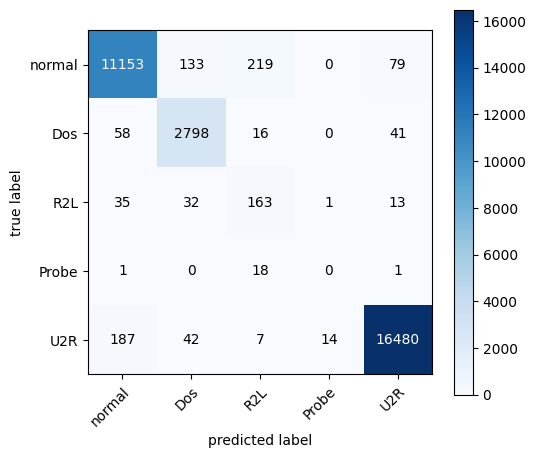

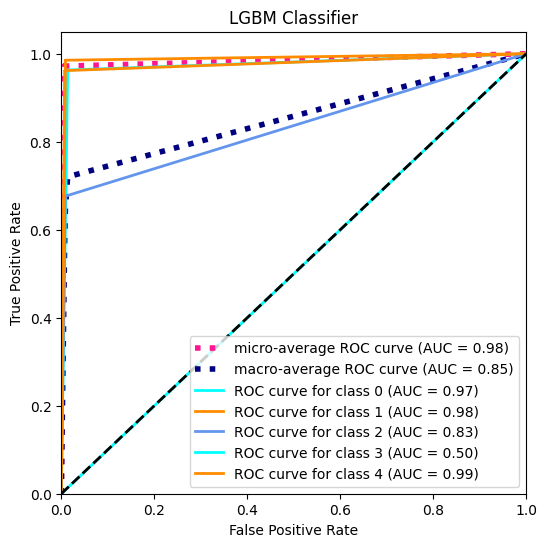

In [68]:
# Evaluate the LGBM Classifier
Evaluate('LGBM Classifier', LGBM, X_valid, Y_valid)

----------------

## 9. CatBoost Classifier

In [388]:
# Instantiate and fit the CatBoost Classifier
CatBoost = CatBoostClassifier(learning_rate=0.1,depth=6,n_estimators=100,l2_leaf_reg=3,random_state=42)
CatBoost.fit(X_train_final, Y_train_final)

0:	learn: 1.2638425	total: 104ms	remaining: 10.3s
1:	learn: 1.0490885	total: 143ms	remaining: 7.02s
2:	learn: 0.8944556	total: 192ms	remaining: 6.2s
3:	learn: 0.7756459	total: 229ms	remaining: 5.49s
4:	learn: 0.6785237	total: 264ms	remaining: 5.01s
5:	learn: 0.5990896	total: 296ms	remaining: 4.64s
6:	learn: 0.5336335	total: 349ms	remaining: 4.64s
7:	learn: 0.4761527	total: 384ms	remaining: 4.42s
8:	learn: 0.4284941	total: 430ms	remaining: 4.35s
9:	learn: 0.3869735	total: 496ms	remaining: 4.46s
10:	learn: 0.3520875	total: 543ms	remaining: 4.39s
11:	learn: 0.3199494	total: 581ms	remaining: 4.26s
12:	learn: 0.2912474	total: 614ms	remaining: 4.11s
13:	learn: 0.2668116	total: 662ms	remaining: 4.06s
14:	learn: 0.2437852	total: 708ms	remaining: 4.01s
15:	learn: 0.2238225	total: 752ms	remaining: 3.95s
16:	learn: 0.2059093	total: 786ms	remaining: 3.84s
17:	learn: 0.1890080	total: 825ms	remaining: 3.76s
18:	learn: 0.1741171	total: 866ms	remaining: 3.69s
19:	learn: 0.1612567	total: 912ms	remainin

In [389]:
# Print the training and testing scores
print("CatBoost Classifier Training Score:", CatBoost.score(X_train_final, Y_train_final))
print("CatBoost Classifier Testing Score:", CatBoost.score(X_valid, Y_valid))


CatBoost Classifier Training Score: 0.9965664384241342
CatBoost Classifier Testing Score: 0.9961497241297186


--------------------------------------------------

Overall Metrics:

The CatBoost Classifier Model Accuracy   = 1.0

The CatBoost Classifier Model Precision  = 1.0

The CatBoost Classifier Model Recall     = 1.0

The CatBoost Classifier Model F1 Score   = 1.0

--------------------------------------------------

Per-Class Metrics:

Class       Precision     Recall   F1-Score    Support
-------------------------------------------------------
normal           1.00       1.00       1.00       9186
Dos              0.99       0.98       0.99       2329
R2L              1.00       0.87       0.93        199
Probe            1.00       0.30       0.46         10
U2R              0.99       1.00       1.00      13469
--------------------------------------------------



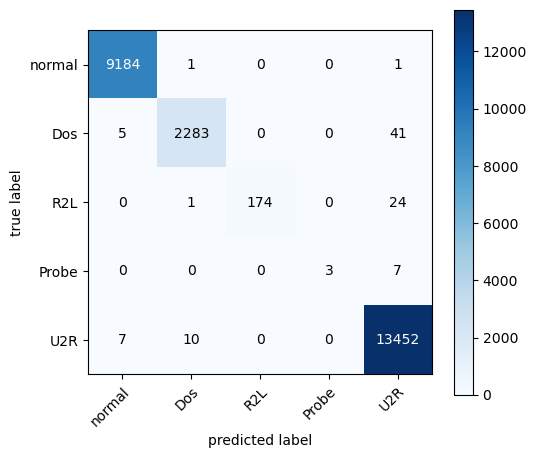

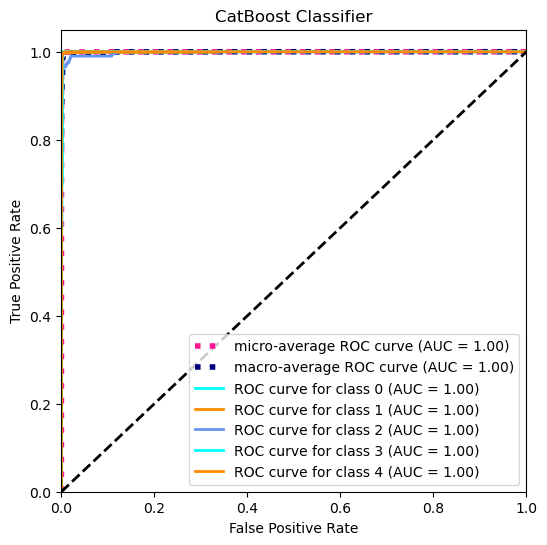

In [393]:
# Evaluate the CatBoost Classifier
Evaluate('CatBoost Classifier', CatBoost, X_valid, Y_valid)

--------------------------------------------------

Overall Metrics:

The Logistic Regression Model Accuracy   = 0.68

The Logistic Regression Model Precision  = 0.61

The Logistic Regression Model Recall     = 0.68

The Logistic Regression Model F1 Score   = 0.63

--------------------------------------------------

Per-Class Metrics:

Class       Precision     Recall   F1-Score    Support
-------------------------------------------------------
normal           0.82       0.67       0.74       7459
Dos              0.51       0.53       0.52       2418
R2L              0.00       0.00       0.00       2885
Probe            0.00       0.00       0.00         67
U2R              0.66       0.94       0.78       9711
--------------------------------------------------



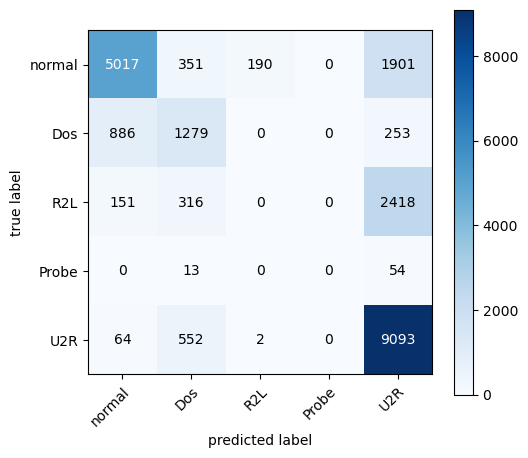

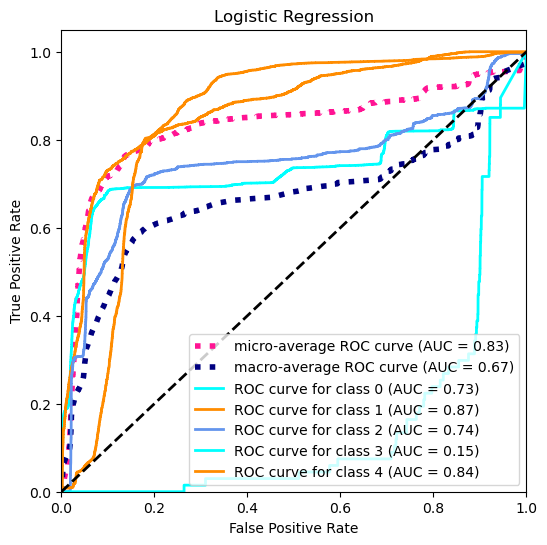

In [394]:
Evaluate('Logistic Regression', LR, X_test, Y_test)

----------------

## 10. Naive Bayes Classifier

In [72]:
# Instantiate and fit the Naive Bayes Classifier
NB = GaussianNB(var_smoothing=1e-9)
NB.fit(X_train_final, Y_train_final)

GaussianNB()

In [73]:
# Print the training and testing scores
print("Naive Bayes Classifier Training Score:", NB.score(X_train_final, Y_train_final))
print("Naive Bayes Classifier Testing Score:", NB.score(X_valid, Y_valid))


Naive Bayes Classifier Training Score: 0.5128397832161911
Naive Bayes Classifier Testing Score: 0.5131307357657744


--------------------------------------------------

The Naive Bayes Classifier Model Accuracy   = 0.51

The Naive Bayes Classifier Model Precision  = 0.76

The Naive Bayes Classifier Model Recall     = 0.51

The Naive Bayes Classifier Model F1 Score   = 0.46

--------------------------------------------------



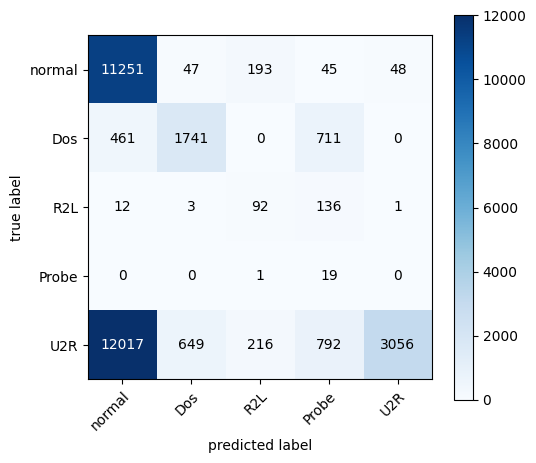

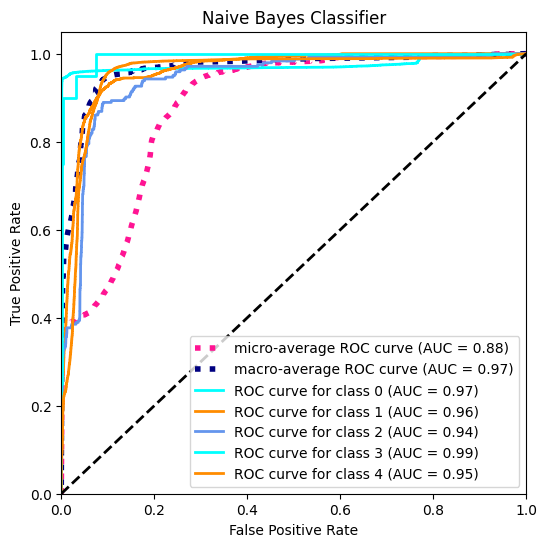

In [74]:
# Evaluate the Naive Bayes Classifier
Evaluate('Naive Bayes Classifier', NB, X_valid, Y_valid)

----------------

## 11. Linear Discriminant Analysis (LDA)

In [75]:
# Instantiate the LDA model 
LDA = LinearDiscriminantAnalysis(solver='lsqr')  
LDA.fit(X_train_final, Y_train_final)

LinearDiscriminantAnalysis(solver='lsqr')

In [76]:
# Print the training and testing scores
print("Linear Discriminant Analysis Training Score:", LDA.score(X_train_final, Y_train_final))
print("Linear Discriminant Analysis Testing Score:", LDA.score(X_valid, Y_valid))

Linear Discriminant Analysis Training Score: 0.97444745533068
Linear Discriminant Analysis Testing Score: 0.9734209774221206


--------------------------------------------------

The Linear Discriminant Analysis Model Accuracy   = 0.97

The Linear Discriminant Analysis Model Precision  = 0.98

The Linear Discriminant Analysis Model Recall     = 0.97

The Linear Discriminant Analysis Model F1 Score   = 0.98

--------------------------------------------------



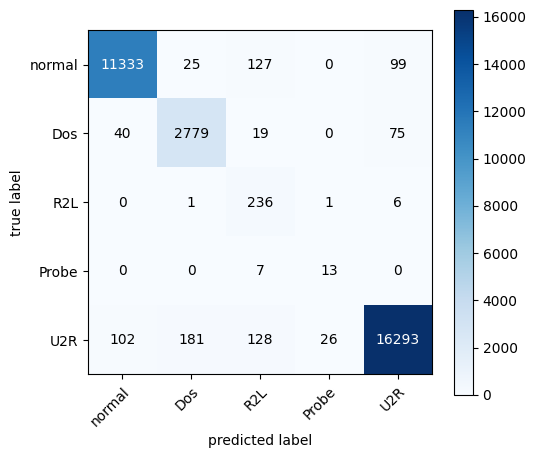

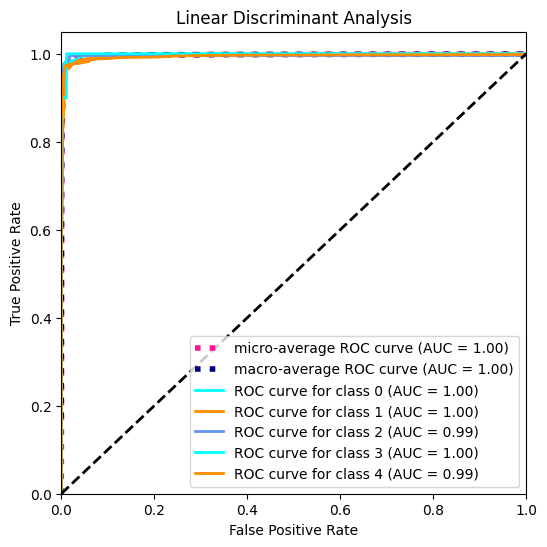

In [77]:
# Evaluate the LDA model
Evaluate('Linear Discriminant Analysis', LDA, X_valid, Y_valid)


----------------

## 12. Quadratic Discriminant Analysis (QDA)

In [78]:
# Instantiate the QDA model 
QDA = QuadraticDiscriminantAnalysis(reg_param=0.1) 
QDA.fit(X_train_final, Y_train_final)

QuadraticDiscriminantAnalysis(reg_param=0.1)

In [79]:
# Print the training and testing scores
print("Quadratic Discriminant Analysis Training Score:", QDA.score(X_train_final, Y_train_final))
print("Quadratic Discriminant Analysis Testing Score:", QDA.score(X_valid, Y_valid))


Quadratic Discriminant Analysis Training Score: 0.9376958252180541
Quadratic Discriminant Analysis Testing Score: 0.9350925661300054


--------------------------------------------------

The Quadratic Discriminant Analysis Model Accuracy   = 0.94

The Quadratic Discriminant Analysis Model Precision  = 0.94

The Quadratic Discriminant Analysis Model Recall     = 0.94

The Quadratic Discriminant Analysis Model F1 Score   = 0.94

--------------------------------------------------



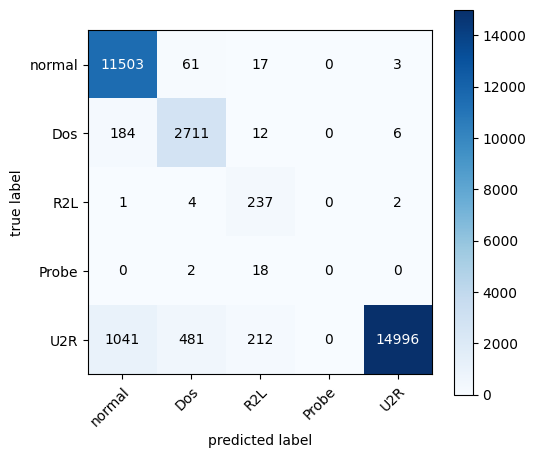

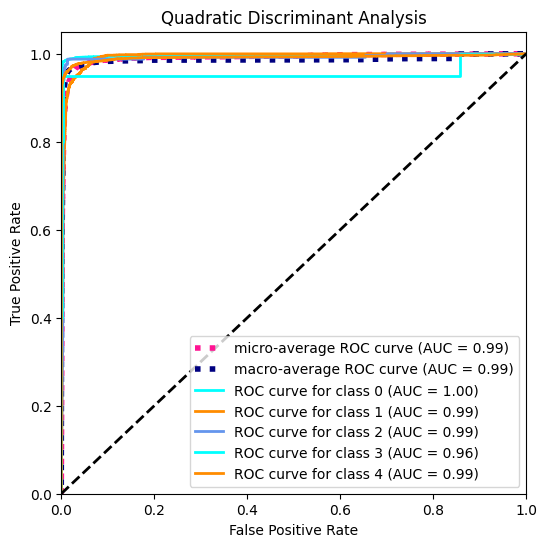

In [80]:
# Evaluate the QDA model 
Evaluate('Quadratic Discriminant Analysis', QDA, X_valid, Y_valid)

----------------

## 13. Passive Aggressive Classifier

In [81]:
# Create PassiveAggressiveClassifier
PAC_classifier = PassiveAggressiveClassifier(C=0.1, max_iter=1000)

# Wrap PassiveAggressiveClassifier inside CalibratedClassifierCV with method='sigmoid' for Platt scaling
Platt_PAC = CalibratedClassifierCV(PAC_classifier, method='sigmoid')

# Fit the classifier
Platt_PAC.fit(X_train_final, Y_train_final)

CalibratedClassifierCV(estimator=PassiveAggressiveClassifier(C=0.1))

In [82]:
# Print the training and testing scores
print("Passive Aggressive Classifier Training Score:", Platt_PAC.score(X_train_final, Y_train_final))
print("Passive Aggressive Classifier Testing Score:", Platt_PAC.score(X_valid, Y_valid))


Passive Aggressive Classifier Training Score: 0.6617728004064697
Passive Aggressive Classifier Testing Score: 0.6600616049029882


--------------------------------------------------

The Passive Aggressive Classifier Model Accuracy   = 0.66

The Passive Aggressive Classifier Model Precision  = 0.69

The Passive Aggressive Classifier Model Recall     = 0.66

The Passive Aggressive Classifier Model F1 Score   = 0.59

--------------------------------------------------



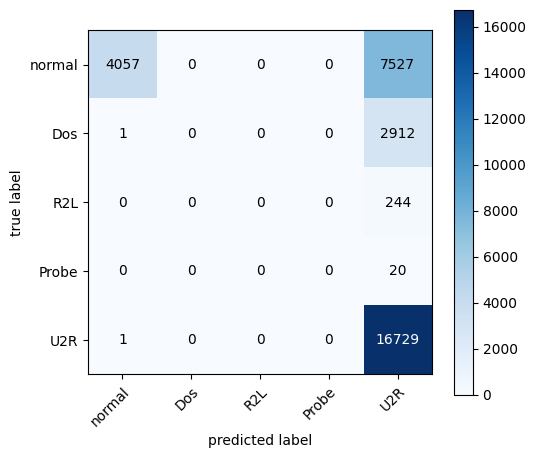

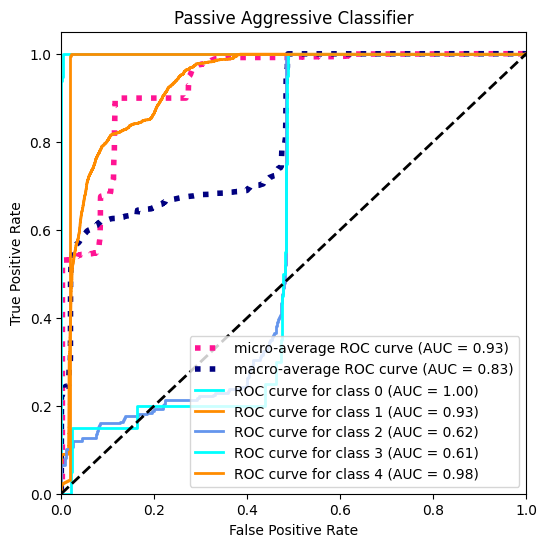

In [83]:
# Evaluate the Passive Aggressive Classifier
Evaluate('Passive Aggressive Classifier', Platt_PAC, X_valid, Y_valid)

----------------

## 14. AdaBoost Classifier

In [84]:
# Instantiate the base estimator (DecisionTreeClassifier)
base_estimator = DecisionTreeClassifier(max_features=6, max_depth=4)  

# Instantiate the AdaBoost Classifier with adjusted parameters
AdaBoost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, learning_rate=1.0)  
AdaBoost.fit(X_train_final, Y_train_final)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         max_features=6),
                   n_estimators=100)

In [85]:
# Print the training and testing scores
print("AdaBoost Classifier Training Score:", AdaBoost.score(X_train_final, Y_train_final))
print("AdaBoost Classifier Testing Score:", AdaBoost.score(X_valid, Y_valid))

AdaBoost Classifier Training Score: 1.0
AdaBoost Classifier Testing Score: 0.9998094693722016


--------------------------------------------------

The AdaBoost Classifier Model Accuracy   = 1.0

The AdaBoost Classifier Model Precision  = 1.0

The AdaBoost Classifier Model Recall     = 1.0

The AdaBoost Classifier Model F1 Score   = 1.0

--------------------------------------------------



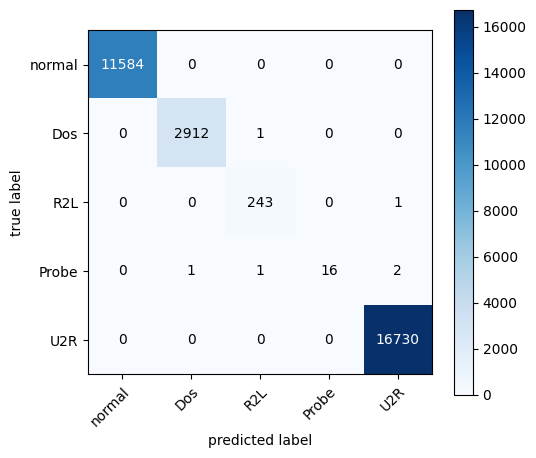

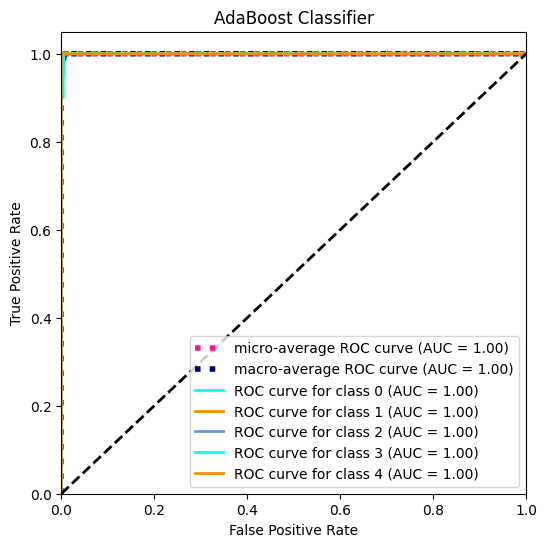

In [86]:
# Evaluate the AdaBoost Classifier
Evaluate('AdaBoost Classifier', AdaBoost, X_valid, Y_valid)

----------------

## 15. Ridge Classifier

In [87]:
# Create RidgeClassifier
ridge_classifier = RidgeClassifier(alpha=1.0)

# Wrap RidgeClassifier inside CalibratedClassifierCV with method='sigmoid' for Platt scaling
Platt_ridge = CalibratedClassifierCV(ridge_classifier, method='sigmoid')

# Fit the classifier
Platt_ridge.fit(X_train_final, Y_train_final)


CalibratedClassifierCV(estimator=RidgeClassifier())

In [88]:
# Print the training and testing scores
print("Ridge Classifier Training Score:", Platt_ridge.score(X_train_final, Y_train_final))
print("Ridge Classifier Testing Score:", Platt_ridge.score(X_valid, Y_valid))

Ridge Classifier Training Score: 0.995585993733593
Ridge Classifier Testing Score: 0.9950462036772412


--------------------------------------------------

The Ridge Classifier Model Accuracy   = 1.0

The Ridge Classifier Model Precision  = 1.0

The Ridge Classifier Model Recall     = 1.0

The Ridge Classifier Model F1 Score   = 0.99

--------------------------------------------------



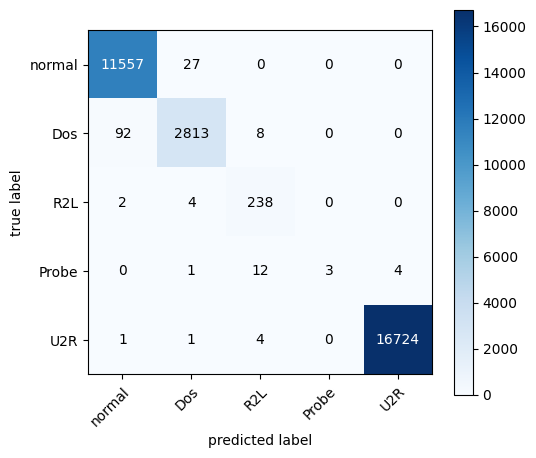

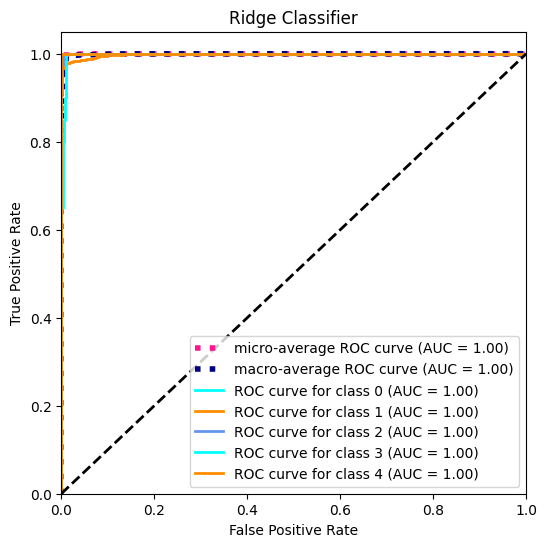

In [89]:
# Evaluate the Ridge Classifier
Evaluate('Ridge Classifier', Platt_ridge, X_valid, Y_valid)